In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

## load data from Github into new frame and remove rows with absent data ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df-combined.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')
    
df = df.dropna()
print(df)

           DATE    NCF    RCF    WTI    HH  Brent  NBP_UK  GBP-USD       NBP
1    2009-01-02  74.35  81.00  46.17  5.41  46.91   54.74   1.4453  7.911572
4    2009-01-05  77.65  84.40  48.61  5.83  49.62   56.66   1.4708  8.333553
5    2009-01-06  81.25  88.50  48.56  6.10  50.53   59.88   1.4919  8.933497
6    2009-01-07  78.65  86.25  42.75  5.89  45.86   58.03   1.5111  8.768913
7    2009-01-08  79.15  84.00  41.68  5.96  44.67   55.74   1.5202  8.473595
...         ...    ...    ...    ...   ...    ...     ...      ...       ...
4254 2020-08-25  49.75  48.90  43.17  2.54  45.86   24.61   1.3148  3.235723
4255 2020-08-26  49.70  48.95  43.21  2.52  45.64   25.10   1.3193  3.311443
4256 2020-08-27  49.80  48.90  42.88  2.52  45.09   26.68   1.3206  3.523361
4257 2020-08-28  50.60  52.20  42.96  2.46  45.81   28.95   1.3344  3.863088
4260 2020-08-31  51.95  52.90  42.61  2.30  45.28   28.95   1.3379  3.873220

[2856 rows x 9 columns]


In [2]:
## price return calculations ##

for col in df.columns[1:9]:
    df[col+'_r'] = (df[col].pct_change())
df = df.dropna()
print(df)

           DATE    NCF    RCF    WTI    HH  Brent  NBP_UK  GBP-USD       NBP  \
4    2009-01-05  77.65  84.40  48.61  5.83  49.62   56.66   1.4708  8.333553   
5    2009-01-06  81.25  88.50  48.56  6.10  50.53   59.88   1.4919  8.933497   
6    2009-01-07  78.65  86.25  42.75  5.89  45.86   58.03   1.5111  8.768913   
7    2009-01-08  79.15  84.00  41.68  5.96  44.67   55.74   1.5202  8.473595   
8    2009-01-09  76.90  83.50  40.69  5.60  44.42   56.42   1.5111  8.525626   
...         ...    ...    ...    ...   ...    ...     ...      ...       ...   
4254 2020-08-25  49.75  48.90  43.17  2.54  45.86   24.61   1.3148  3.235723   
4255 2020-08-26  49.70  48.95  43.21  2.52  45.64   25.10   1.3193  3.311443   
4256 2020-08-27  49.80  48.90  42.88  2.52  45.09   26.68   1.3206  3.523361   
4257 2020-08-28  50.60  52.20  42.96  2.46  45.81   28.95   1.3344  3.863088   
4260 2020-08-31  51.95  52.90  42.61  2.30  45.28   28.95   1.3379  3.873220   

         NCF_r     RCF_r     WTI_r     

In [3]:
## markov regime switching for univariate analysis ##

mod = sm.tsa.MarkovRegression(df["HH"], k_regimes=2, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                     HH   No. Observations:                 2855
Model:               MarkovRegression   Log Likelihood               -2306.739
Date:                Mon, 15 Nov 2021   AIC                           4625.477
Time:                        17:52:26   BIC                           4661.218
Sample:                             0   HQIC                          4638.366
                               - 2855                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5834      0.014    190.277      0.000       2.557       2.610
sigma2         0.1964      0.008     24.811      0.000       0.181       0.212
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0697      0.021    191.624      0.000       4.028       4.111
sigma2         0.4399      0.018     24.967      0.000       0.405       0.474
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9961      0.002    604.942      0.000       0.993       0.999
p[1->0]        0.0047      0.002      2.388      0.017       0.001       0.008
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

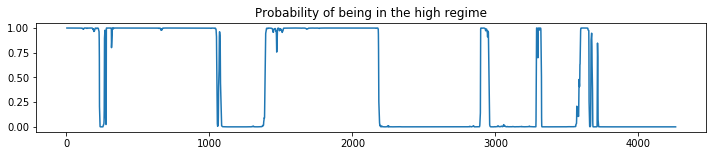

In [4]:
res_mod.filtered_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,2))

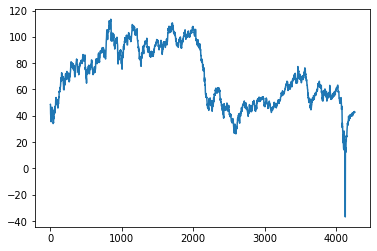

In [5]:
plt.plot(df["WTI"])

In [6]:
## markov regime switching for univariate returns analysis ##

mod = sm.tsa.MarkovRegression(df["GBP-USD"], k_regimes=3, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1287: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  EstimationWarning)
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1287: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  EstimationWarning)
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1457: RuntimeWarning: divide by zero encountered in log
  np.log(1 + sum_exp - exp[i]) +


ValueError: Could not untransform parameters.